In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data=pd.read_csv('cyberbullying_tweets.csv')

In [3]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
pip install Unidecode

   ---------------------------------------- 0.0/235.5 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.5 kB ? eta -:--:--
   ------------------- -------------------- 112.6/235.5 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 194.6/235.5 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 235.5/235.5 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud

   ---------------------------------------- 0.0/300.7 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.7 kB 660.6 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/300.7 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.7 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/300.7 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.7/300.7 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from nltk.corpus import stopwords
import re
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [9]:
data.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

**data cleaning**

In [10]:
def case_convert():
    data.tweet_text = [i.lower() for i in data.tweet_text.values]

def remove_specials():
    data.tweet_text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.tweet_text.values]

def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.tweet_text = texts

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.tweet_text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data.tweet_text = texts
                
def remove_links():
    texts = []
    for text in data.tweet_text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.tweet_text = texts

def remove_accents():
    data.tweet_text = [unidecode.unidecode(text) for text in data.tweet_text.values]

def normalize_spaces():
    data.tweet_text = [re.sub(r"\s+"," ",text) for text in data.tweet_text.values]

case_convert()
remove_links()
remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
print(data)

                                              tweet_text cyberbullying_type
0                words katandandre food crapilicious mkr  not_cyberbullying
1       aussietv white mkr theblock imacelebrityau to...  not_cyberbullying
2       xochitlsuckkks classy whore red velvet cupcakes   not_cyberbullying
3       jason gio meh p thanks heads concerned anothe...  not_cyberbullying
4       rudhoeenglish isis account pretending kurdish...  not_cyberbullying
...                                                  ...                ...
47687   black ppl expected anything depended anything...          ethnicity
47688   turner withhold disappointment turner called ...          ethnicity
47689   swear god dumb nigger bitch got bleach hair r...          ethnicity
47690   yea fuck rt therealexel youre nigger fucking ...          ethnicity
47691   bro u gotta chill rt chillshrammy dog fuck kp...          ethnicity

[47692 rows x 2 columns]


In [11]:
lenc = LabelEncoder()
data.cyberbullying_type = lenc.fit_transform(data.cyberbullying_type)


eda

In [12]:
lenc.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

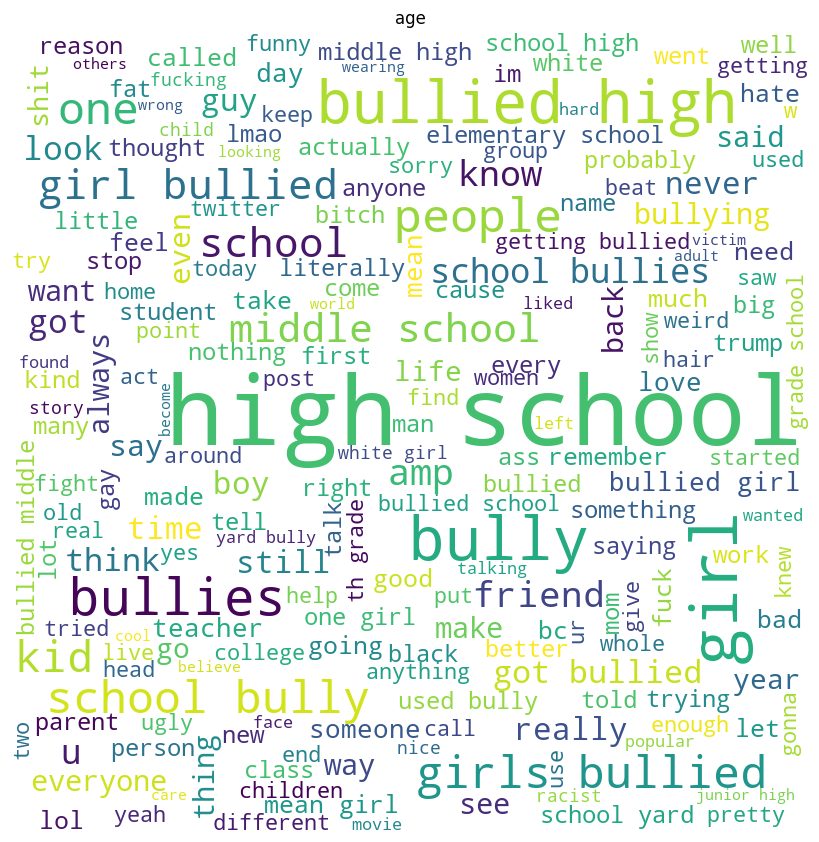

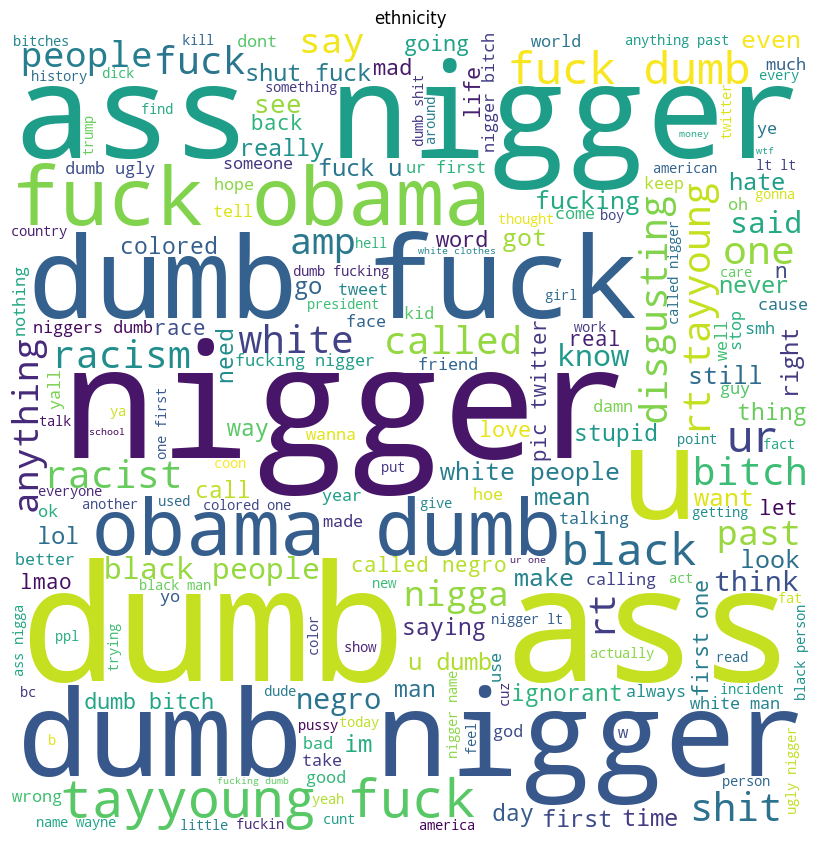

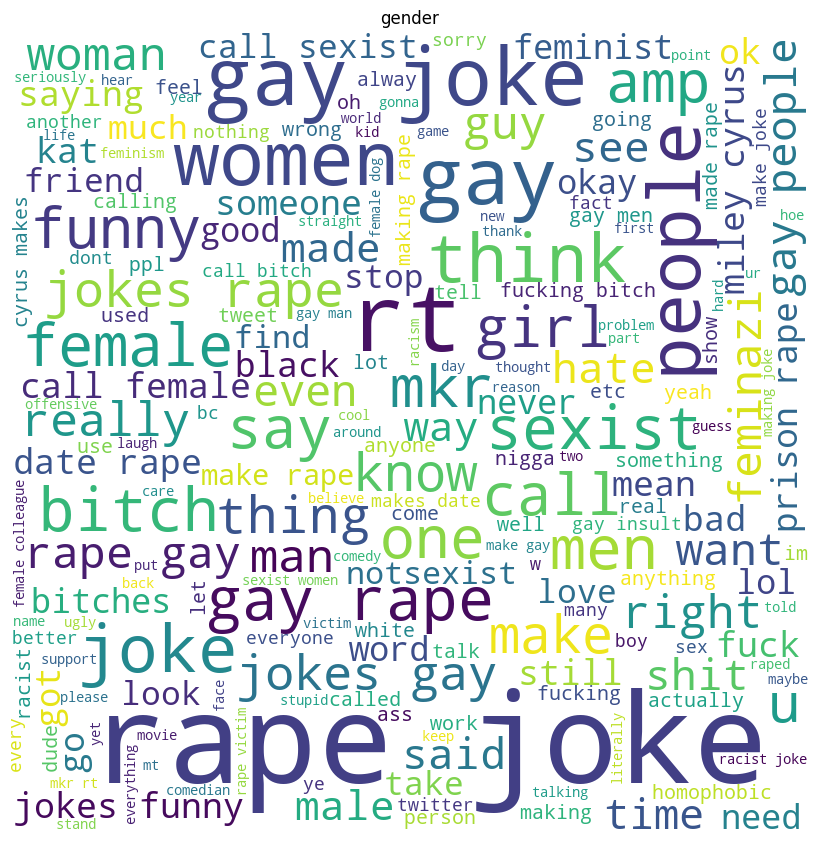

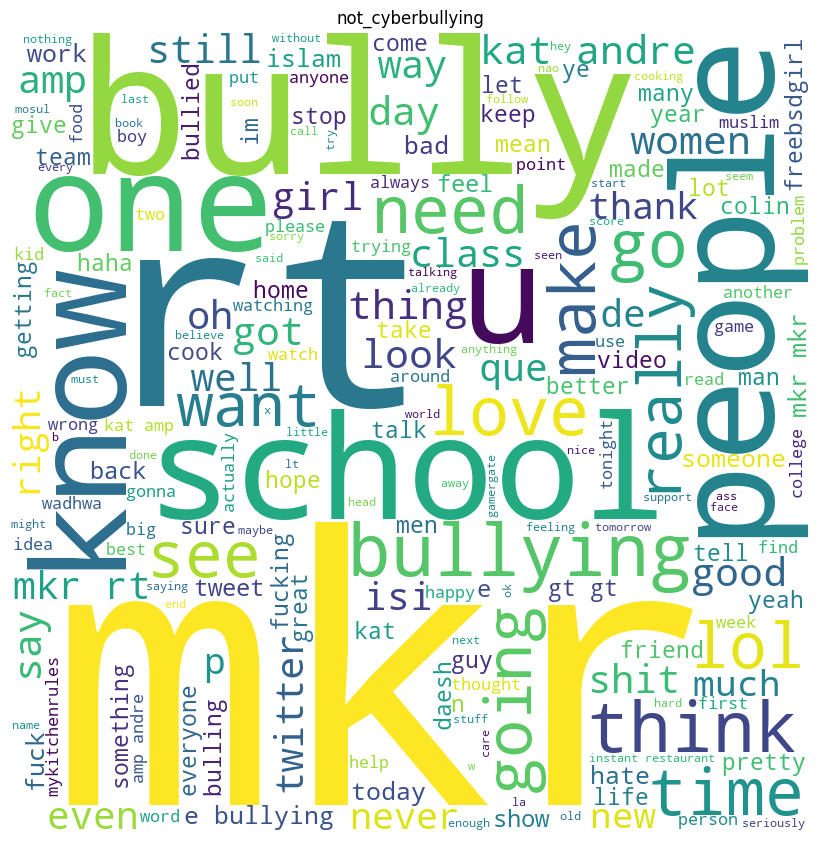

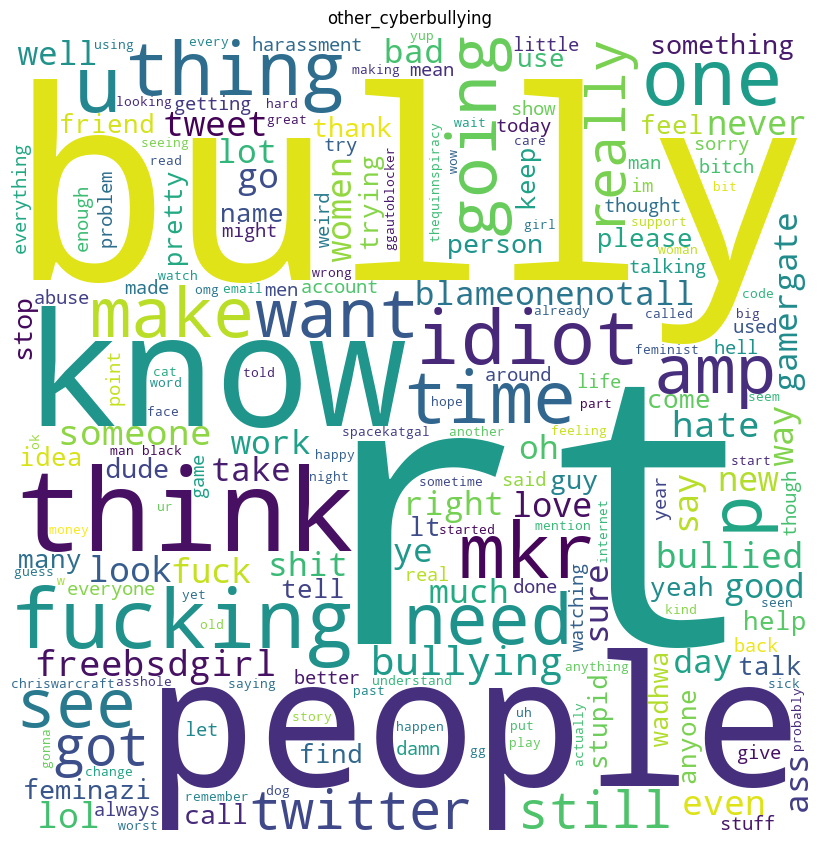

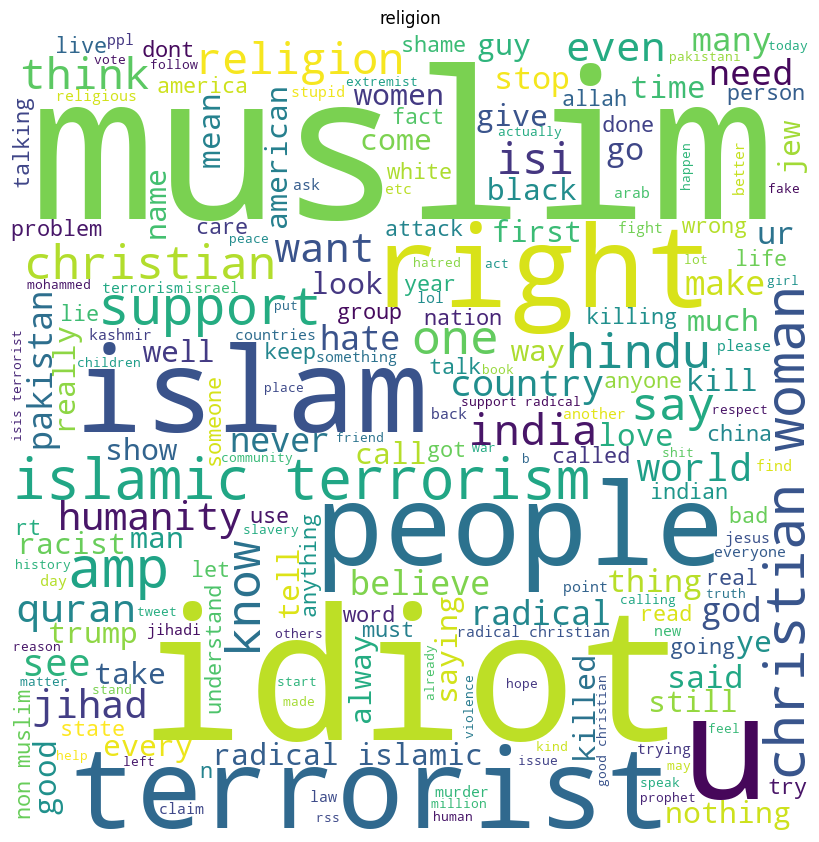

In [13]:
for c in range(len(lenc.classes_)):
    string = ""
    for i in data[data.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

**data prepration**

In [14]:
from sklearn.model_selection import train_test_split
vec = TfidfVectorizer(max_features=3000)
X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(data.tweet_text.values).toarray(), 
                                                    data.cyberbullying_type.values.reshape(-1,1), 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

**modelling**

random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_9400\2473469416.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(log_model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(log_model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(log_model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(log_model.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 87.44 %
Test Accuracy   : 82.78 %
Precision       : 82.89 %
Recall          : 83.44 %


In [14]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 95.86 %
Test Accuracy   : 80.75 %
Precision       : 80.92 %
Recall          : 81.01 %


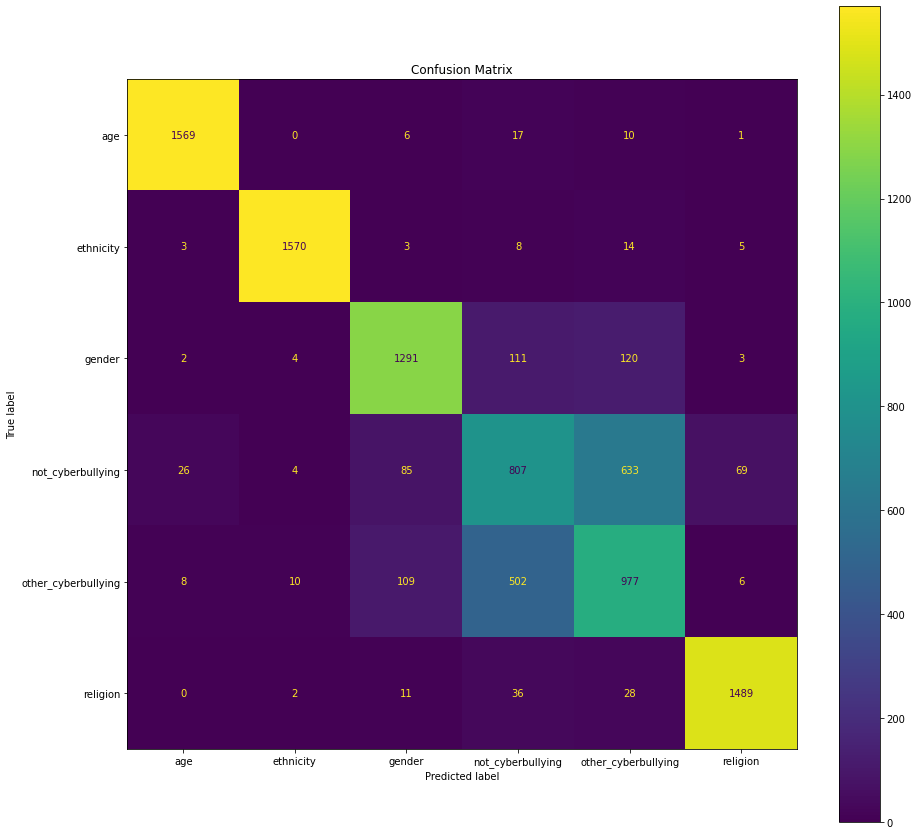

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

Deep learning

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB


In [17]:
data.cyberbullying_type.unique()

array([3, 2, 5, 4, 0, 1])

In [18]:

data = pd.get_dummies(data,columns=['cyberbullying_type'])


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['tweet_text'],
                                                    data.drop('tweet_text',axis=1),

                                                    test_size=0.33
                                                    )


In [20]:
x_train.shape

(31953,)

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_vocab_size=20000
tokenizer=Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
train=tokenizer.texts_to_sequences(x_train)
tokenizer2=Tokenizer(num_words=max_vocab_size)
tokenizer2.fit_on_texts(x_test)
test=tokenizer2.texts_to_sequences(x_test)


In [22]:
word2idx=tokenizer.word_index
V=len(word2idx)
print(V)


42510


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
dtrain = pad_sequences(train)
dtest=pad_sequences(test)

T=dtrain.shape[1]
D=20

In [24]:
print(dtrain.shape,"'''''''",dtest.shape,"''''''''''''",y_test.shape,"''''''''",y_train.shape)

(31953, 399) ''''''' (15739, 156) '''''''''''' (15739, 6) '''''''' (31953, 6)


In [25]:
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Activation, BatchNormalization,Input,Embedding, GlobalMaxPooling1D

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='sigmoid')(x)
model = Model(i, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(dtrain,y_train,
          epochs=10,
         
         )
model.summary()

Epoch 1/10
999/999 [==============================] - 12s 5ms/step - loss: 0.2738 - accuracy: 0.5821
Epoch 2/10
999/999 [==============================] - 5s 5ms/step - loss: 0.1871 - accuracy: 0.7192
Epoch 3/10
999/999 [==============================] - 5s 5ms/step - loss: 0.1588 - accuracy: 0.7729
Epoch 4/10
999/999 [==============================] - 5s 5ms/step - loss: 0.1353 - accuracy: 0.8063
Epoch 5/10
999/999 [==============================] - 5s 5ms/step - loss: 0.1182 - accuracy: 0.8262
Epoch 6/10
999/999 [==============================] - 7s 7ms/step - loss: 0.1074 - accuracy: 0.8397
Epoch 7/10
999/999 [==============================] - 6s 6ms/step - loss: 0.0999 - accuracy: 0.8472
Epoch 8/10
999/999 [==============================] - 5s 5ms/step - loss: 0.0954 - accuracy: 0.8519
Epoch 9/10
999/999 [==============================] - 5s 5ms/step - loss: 0.0916 - accuracy: 0.8538
Epoch 10/10
999/999 [==============================] - 5s 5ms/step - loss: 0.0890 - accuracy: 0.857

In [26]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 87.44 %
Test Accuracy   : 82.78 %
Precision       : 82.89 %
Recall          : 83.44 %
